In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/Rahul Pundir/Desktop/capstone dataset/train.csv")
data.head()

C:\Users\Rahul Pundir\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [3]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [12]:
data.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [13]:
data.StateHoliday = data.StateHoliday.astype(str)
data.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [14]:
# Listing the number of unique values for each column present in dataset
# Apply the function to each column (which is axis =0) of dataset 

def count_unique(column):
    return len(column.unique())

data.apply(count_unique, axis=0).astype(np.int32)

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int32

In [15]:
data.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

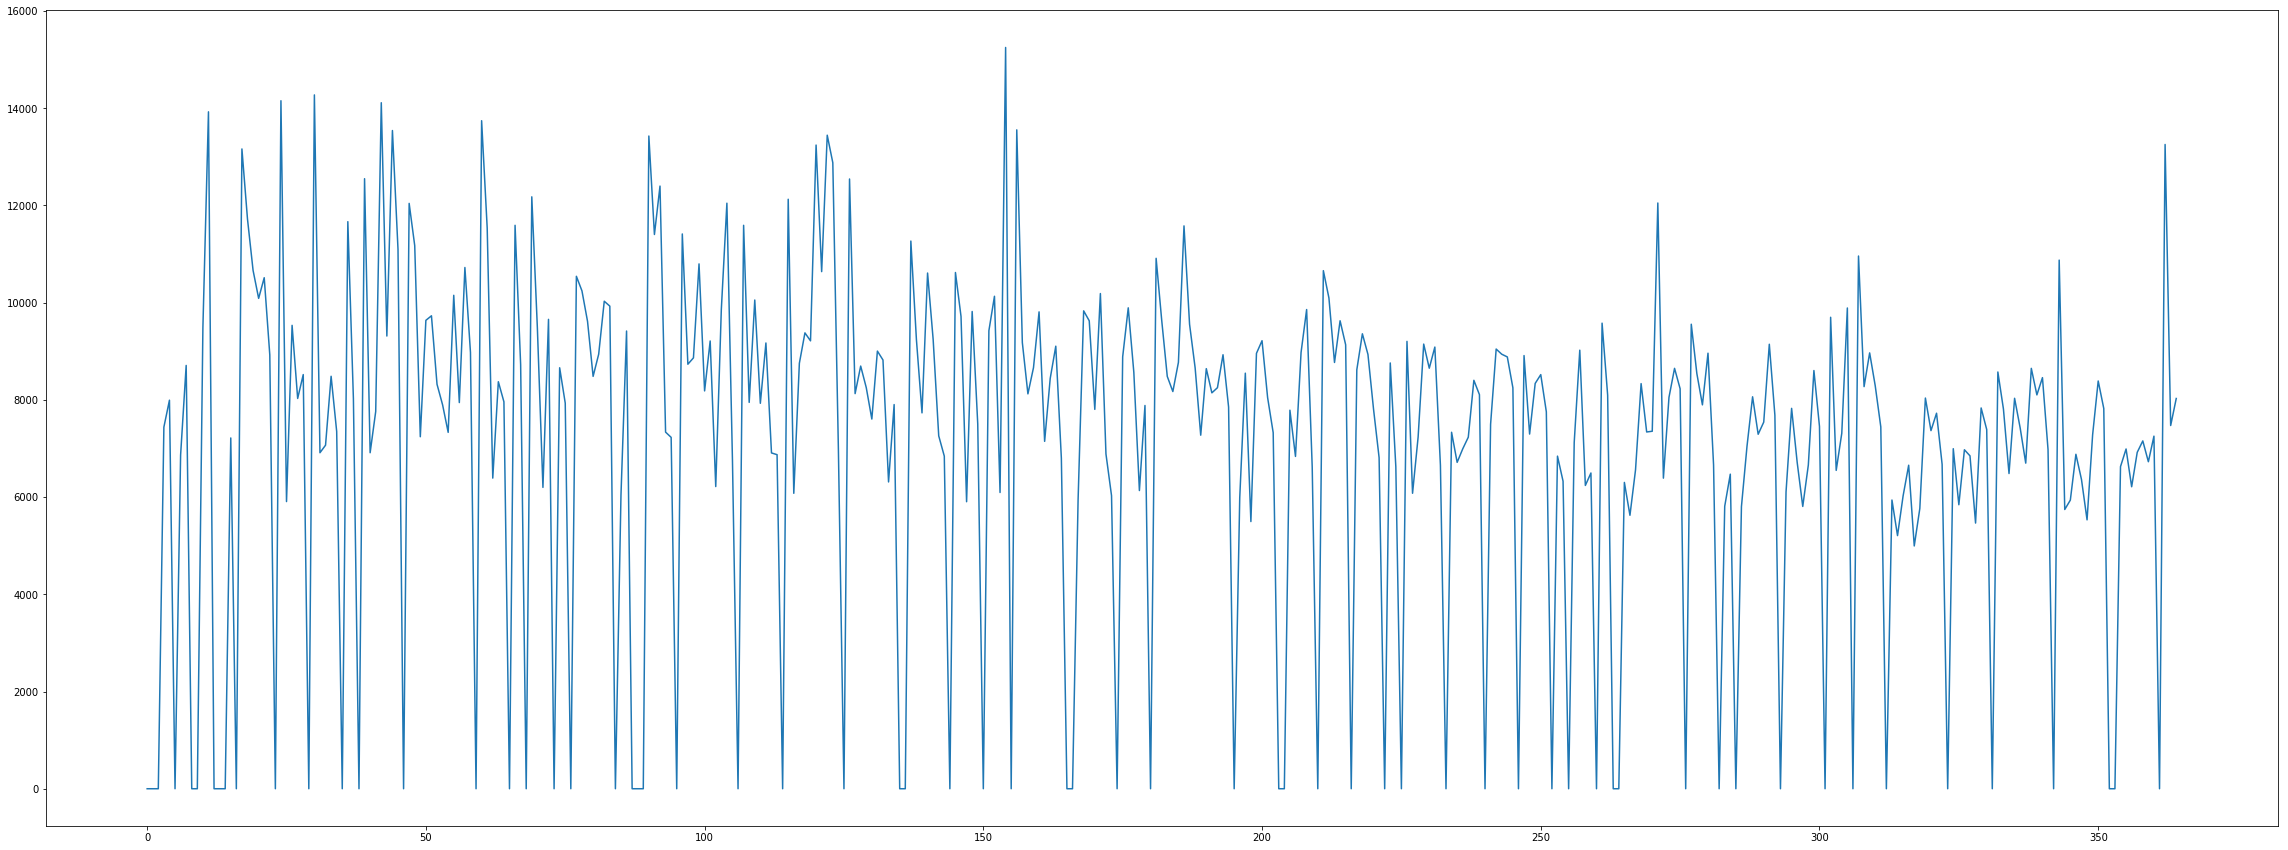

In [16]:
store_data = data[data.Store==150].sort_values('Date')
plt.figure(figsize=(40,15))  
plt.plot(store_data.Sales.values[:365])

C:\Users\Rahul Pundir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0,0.5,'Sales')

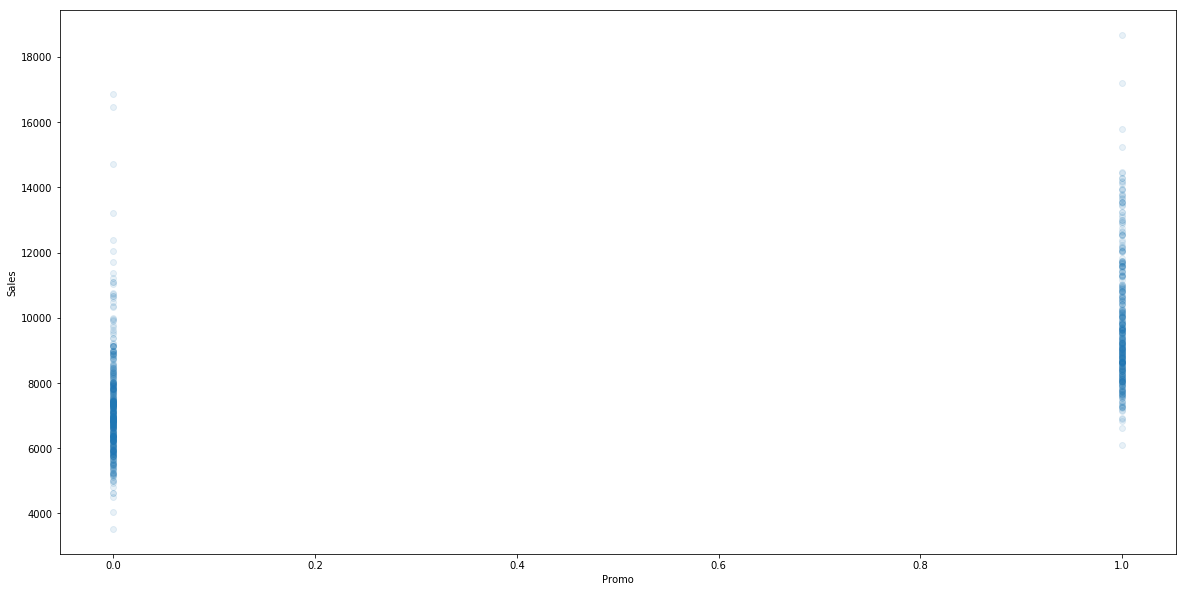

In [7]:
plt.figure(figsize=(20, 10))
plt.scatter(x=store_data[data.Open==1].Promo, y=store_data[data.Open==1].Sales, alpha=0.1)
plt.xlabel('Promo')
plt.ylabel('Sales')

# Transform the data 

In [17]:
transformed_data = data.drop(['Store', 'Date', 'Customers'], axis=1)
transformed_data.head()

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday
0,5,5263,1,1,0,1
1,5,6064,1,1,0,1
2,5,8314,1,1,0,1
3,5,13995,1,1,0,1
4,5,4822,1,1,0,1


In [19]:
transformed_data = pd.get_dummies(transformed_data, columns=['DayOfWeek', 'StateHoliday'])

In [20]:
X = transformed_data.drop(['Sales'], axis=1).values
y = transformed_data.Sales.values
print("The training dataset has {} examples and {} features.".format(X.shape[0], X.shape[1]))

The training dataset has 1017209 examples and 14 features.


# building a model and cross validating it

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv

lr = LinearRegression()
kfolds = cv.KFold(X.shape[0], n_folds=4, shuffle=True, random_state=42)
scores = cv.cross_val_score(lr, X, y, cv=kfolds)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.55 (+/- 0.00)


# Now we will visualize our predictions

# We'll keep store 150 out for rest and train our model on every store except store 150 and then predict sales for store 150.

In [22]:
lr = LinearRegression()
X_store = pd.get_dummies(data[data.Store!=150], columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values
y_store = pd.get_dummies(data[data.Store!=150], columns=['DayOfWeek', 'StateHoliday']).Sales.values
lr.fit(X_store, y_store)
y_store_predict = lr.predict(pd.get_dummies(store_data, columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values)

In [ ]:
graph predicting the accuracy of sale prediction

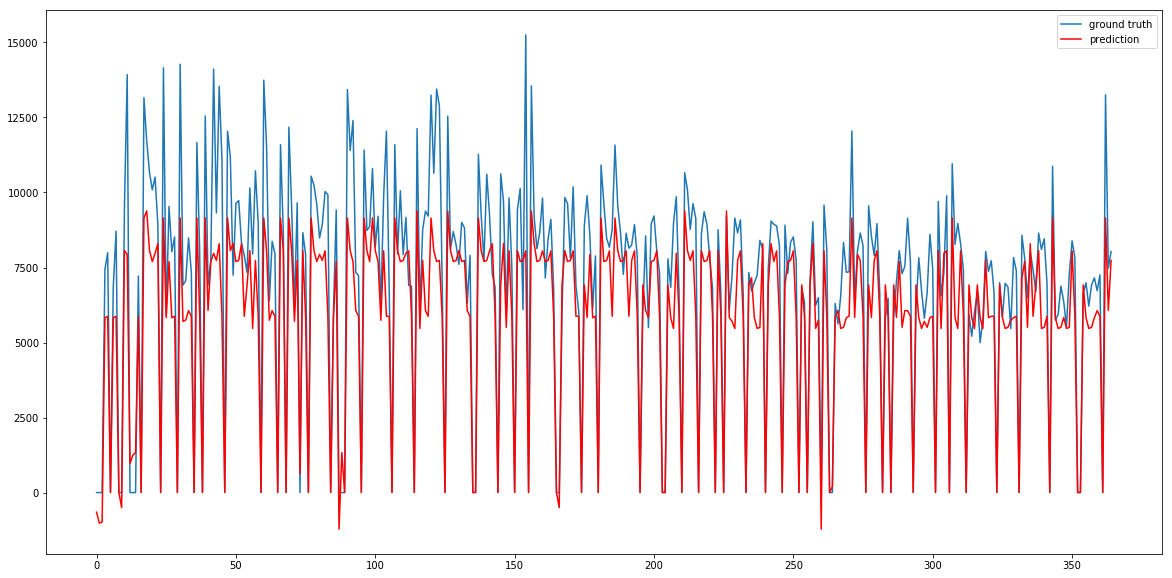

In [23]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales.values[:365], label="ground truth")
plt.plot(y_store_predict[:365], c='r', label="prediction")
plt.legend()